# Computación II - 2018
**Guía No. 4: regresión lineal**  
Ingeniería en Estadística - Universidad de Valparaíso  
*Profesor: Eduardo Jorquera - eduardo.jorquera@postgrado.uv.cl*

## 1. Regresión lineal simple
### 1.1 ¿Qué es una rergesión lineal?
Una regresión lineal es la forma estadística de asociar una o más variables a una variable "respuesta", donde la variable respuesta depende de las demás, es decir, variables explicativas.

Para empezar, asumamos que entre dos variables, donde una depende de la otra, busca escribir matemáticamente una en función de la otra, a través de una relación lineal. La primera aproximación, podría ser algo así:
\begin{eqnarray}
y_i = \beta_1 + \beta_2 x_i
\end{eqnarray}

Veamos un gráico de esto a continuación:

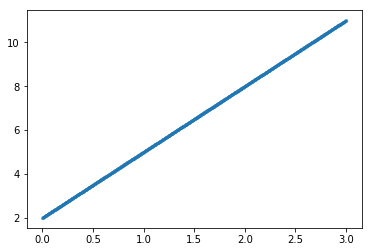

In [10]:
import numpy as np, matplotlib.pyplot as plt
a, b = 2, 3
x=np.linspace(0,3,1000)
y=a+b*x
plt.scatter(x, y, s=5, alpha=.5)

Esto se parece a una recta, ¿no? bueno, dado que una variable aleatoria nunca se comportará de forma determinista, ahora podríamos asumir que hay un error aleatorio con alguna distribución de probabilidad, el cual perturba la recta anteriormente descrita:
\begin{eqnarray}
y_i = \beta_1 + \beta_2 x_i + \varepsilon
\end{eqnarray}

¡Perfecto! ahora grafiquémoslo:

* Pregunta: ¿Cuál es la varianza de $\varepsilon$?

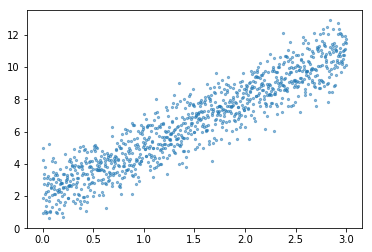

In [11]:
import numpy as np, matplotlib.pyplot as plt
a, b = 2, 3
x=np.linspace(0,3,1000)
y=a+b*x+np.random.randn(1000)
plt.scatter(x, y, s=5, alpha=.5)

Ahora que tenemos los datos con esa estructura, ¿cómo se puede hacer una predicción? con la función linear_model del paquete sklearn, veamos el siguiente ejemplo:

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x=np.linspace(0,1,1000)
y=x+.1*np.random.randn(1000)
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

In [29]:
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

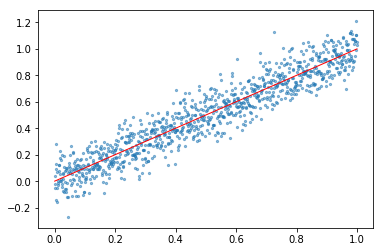

In [30]:
plt.scatter(x, y, s=5, alpha=.5)
plt.plot(x, regr.predict(x), color='red',linewidth=1)

Otra forma de hacer la regersión, la cual es útil usando pandas, es usando el paquete statsmodels:

In [60]:
import pandas as pd
import statsmodels.formula.api as sm

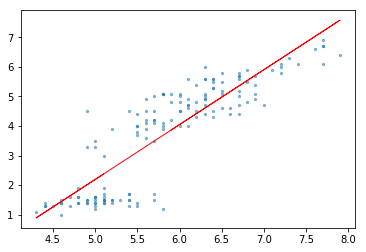

In [74]:
import pandas as pd
iris = pd.read_csv("iris.csv")

resultado = sm.ols(formula= "Petal_Length ~ Sepal_Length" , data=iris).fit()
resultado.params
x=iris.Sepal_Length
y=iris.Petal_Length

plt.scatter(x, y, s=5, alpha=.5)
plt.plot(iris.Sepal_Length, resultado.predict(), color='red',linewidth=1)

## 1.2 Actividad
* Simule la siguiente ecuación en un objeto de pandas:
\begin{eqnarray}
y_i= \frac{\pi}{3}+5 x_i + \varepsilon
\end{eqnarray}
donde $\varepsilon \sim Normal(0,3)$

* Obtenga los parámetros estimados y haga un gráfico de la estimación.
* ¿Cómo podría estimar algún tipo de error en el modelo?

## 1.3 Actividad
* Simule $1.000$ datos en el cuadrado $[0,3]\times [0,3]$, y simule el siguiente modelo de regresión lineal simple:
\begin{eqnarray}
y_i= e^\pi+e^{\pi+1} x_i^2 + \varepsilon
\end{eqnarray}
* Similar a la actividad anterior, obtenga los parámetros estimados y haga un gráfico de la estimación.

In [75]:
x=np.linspace(0,1,1000)
y=x**2+.1*np.random.randn(1000)
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

In [76]:
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(x**2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

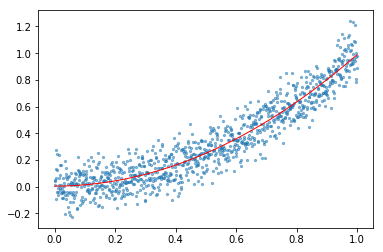

In [77]:
plt.scatter(x, y, s=5, alpha=.5)
plt.plot(x, regr.predict(x**2), color='red',linewidth=1)